# **Hierarchical Clustering**

* Hierarchical clustering groups data points based on their similarity.
* It’s similar to K-means clustering but operates differently.
* The result of hierarchical clustering can sometimes resemble that of K-means clustering.

# Types of Hierarchical Clustering:

* Agglomerative Clustering:
   * Bottom-up approach: Starts with individual data points and merges them into clusters.
   * Continues until all data points are in one big cluster.
* Divisive Clustering:
   * Top-down approach: Treats all data points as one big cluster.
   * Divides this large cluster into smaller ones iteratively.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In our first example we will cluster the X numpy arrays of data points.
The process of clustering is similer to any other unsupervised machine learning algorithms. 

In [2]:
# Example data
x = np.array([[5, 3],
              [10, 15],
              [15, 12],
              [24, 10],
              [30, 30],
              [85, 70],
              [71, 80],
              [60, 78],
              [70, 55],
              [80, 91]])

* We import the AgglomerativeClustering class from sklearn.cluster.
* We create an instance of AgglomerativeClustering with the following parameters:
   * n_clusters: Number of clusters (in this case, 2).
   * affinity: Distance metric (e.g., ‘euclidean’).
   * linkage: Linkage criterion (e.g., ‘ward’).
* Finally, we use the fit_predict method to predict the clusters for each data point.

In [3]:
from sklearn.cluster import AgglomerativeClustering
# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
predicted_clusters = cluster.fit_predict(x)

print("Predicted clusters for each data point:")
print(predicted_clusters)


Predicted clusters for each data point:
[1 1 1 1 1 0 0 0 0 0]


NB: Replace affinity='euclidean' with metric='euclidean'

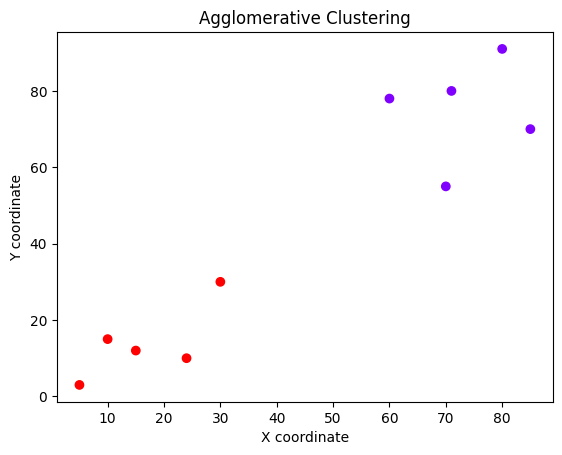

In [4]:
# Scatter plot
plt.scatter(x[:, 0], x[:, 1], c=predicted_clusters, cmap='rainbow')
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Agglomerative Clustering")
plt.show()

In [5]:
# Load the data and look at the first few rows
data = pd.read_csv("/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
#Check the shape of the dataframe and the info
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


(440, 8)

In [7]:
#Normalize tha data and bring all the variables to the same scale
from sklearn.preprocessing import normalize
df = normalize(data)
df = pd.DataFrame(df, columns=data.columns)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


* Normalization is a technique used to change the values in a dataset to a common scale without distorting differences in the ranges of values or losing information. It ensures that all features (variables) have similar scales, which can be crucial for certain machine learning algorithms. Here are some key points about normalization:
     * Why Normalize?
          * Standardization: When we compare measurements that have different units (e.g., age in years vs. income in dollars), standardizing the features around the center (mean) with a standard deviation of 1 is essential. Variables measured at different scales do not contribute equally to the analysis and might introduce bias.
          * Normalization: The goal here is to bring all numeric columns in the dataset to a common scale. It’s necessary when features have different ranges. For instance, consider a dataset with two features: age (ranging from 0 to 100) and income (ranging from 0 to 100,000). Income is about 1,000 times larger than age, so normalizing ensures that both features contribute equally during analysis.
* Methods of Normalization:
     * Min-Max Scaling (MinMaxScaler): This method scales features to a range between 0 and 1. It transforms each value x to (x - min) / (max - min), where min and max are the minimum and maximum values of the feature.
     * Z-Score Standardization (StandardScaler): It standardizes features to have a mean of 0 and a standard deviation of 1. For each value x, it computes (x - mean) / std, where mean and std are the mean and standard deviation of the feature.
     * Robust Scaling (RobustScaler): Similar to Min-Max scaling but uses the median and interquartile range (IQR) instead of min-max values. It’s robust to outliers.

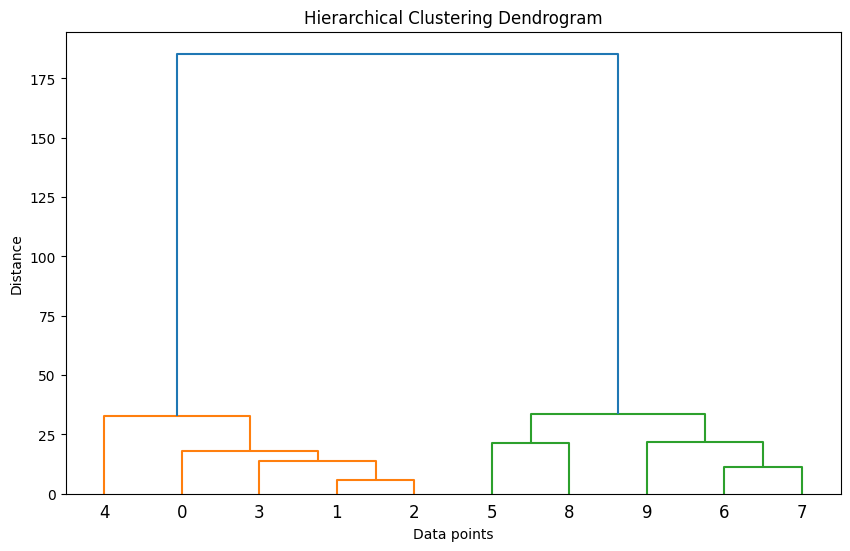

In [8]:
# Draw a dendrogram to help us decide the number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage
# Create linkage matrix
Z = linkage(x, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()


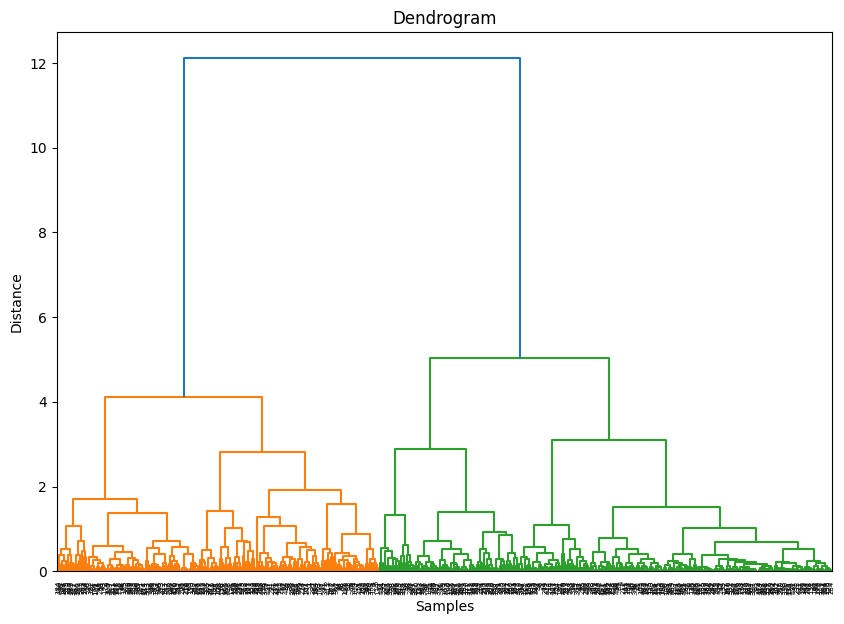

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
den = shc.dendrogram(shc.linkage(df, method='ward'))

The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

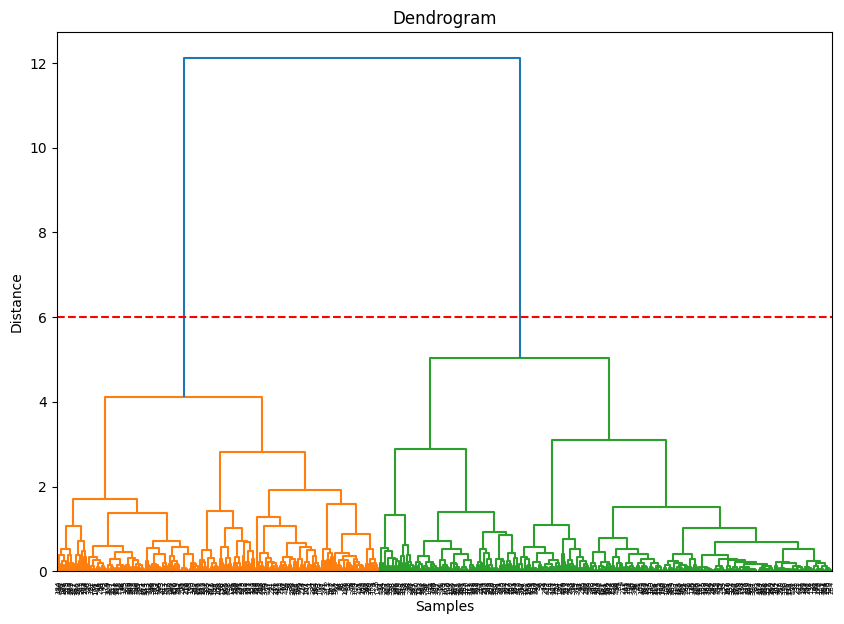

In [10]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
den = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

We have two clusters as the line above cuts the dendrogram at two points.

In [11]:
# Applying hierarchical clustering for the 2 clusters 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean', linkage='ward')
cluster.fit_predict(df)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

* We create an instance of the AgglomerativeClustering class:
   * n_clusters: Specifies the desired number of clusters. In this case, we want 2 clusters.
   * metric: Determines the distance metric used for clustering. Here, we use the Euclidean distance.
   * linkage: Specifies the linkage criterion (how clusters are merged). 'ward' is one such criterion.
* We then apply the clustering algorithm to our data points (usually represented as a dataframe or numpy array):
   * fit_predict(df): This method fits the model to the data (df) and returns an array of cluster labels for each data point.
   * The resulting array contains cluster assignments for each data point (e.g., [0, 1, 0, 1, ...]).
* After running this code, we’ll have assigned each data point to one of the two clusters based on their similarity (using the specified distance metric and linkage criterion).
* Remember that hierarchical clustering builds a tree-like structure of clusters, where data points are successively merged into larger clusters. The choice of linkage and distance metric affects the resulting clusters.

Text(0.5, 1.0, 'Cluster Visualization')

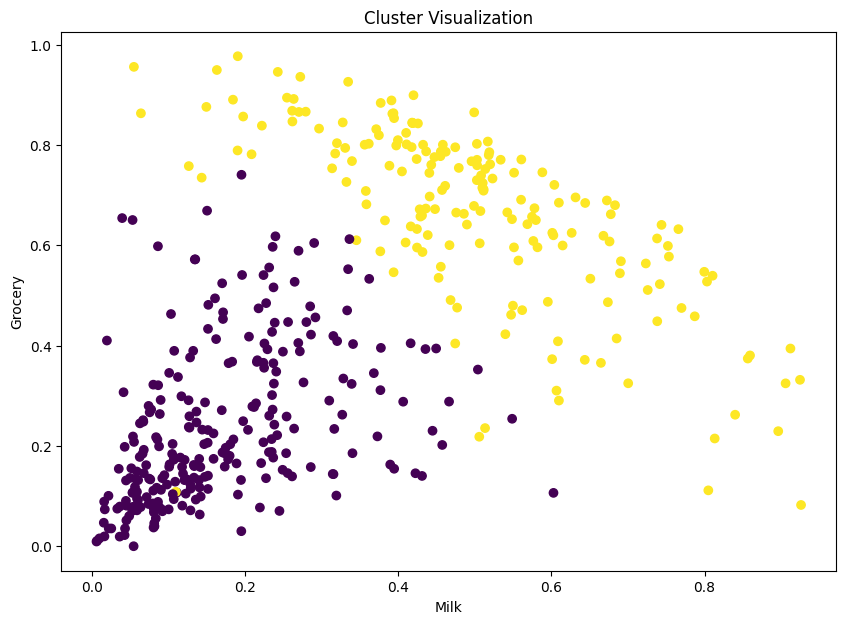

In [12]:
# Visualize the two clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Milk'], df['Grocery'], c=cluster.labels_, cmap='viridis')
plt.xlabel("Milk")
plt.ylabel("Grocery")
plt.title("Cluster Visualization")